In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.1.0


In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
    

In [11]:
#column_names = ['WC','CH01', 'CH02', 'CH03', 'CH04', 'CH05']

raw_dataset = pd.read_csv('d:/sb1015.csv', na_values="?", comment='\t', sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.tail()


,Press,Temp,Qgas,VolGas,GOR,Qoil,VolOil,Qwater,VolWater,WC
986,175.90,41.78,5928.94,97180.33,60.983,97.22,1186.03,33.46,1239.61,25.60
987,175.91,41.89,5923.84,97303.74,60.888,97.29,1188.05,33.40,1240.30,25.56
988,175.91,41.96,5921.08,97427.10,60.832,97.33,1190.08,33.36,1241.00,25.53
989,178.55,44.97,5819.56,97548.34,59.254,98.21,1192.13,32.38,1241.67,24.79
990,178.52,45.13,5817.65,97669.54,59.145,98.36,1194.18,32.30,1242.34,24.72


In [12]:
dataset.isna().sum()

Press         0
Temp         97
Qgas          0
VolGas        1
GOR         102
Qoil          0
VolOil        1
Qwater        0
VolWater      1
WC            0
dtype: int64

In [13]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset  = dataset.drop(train_dataset.index)

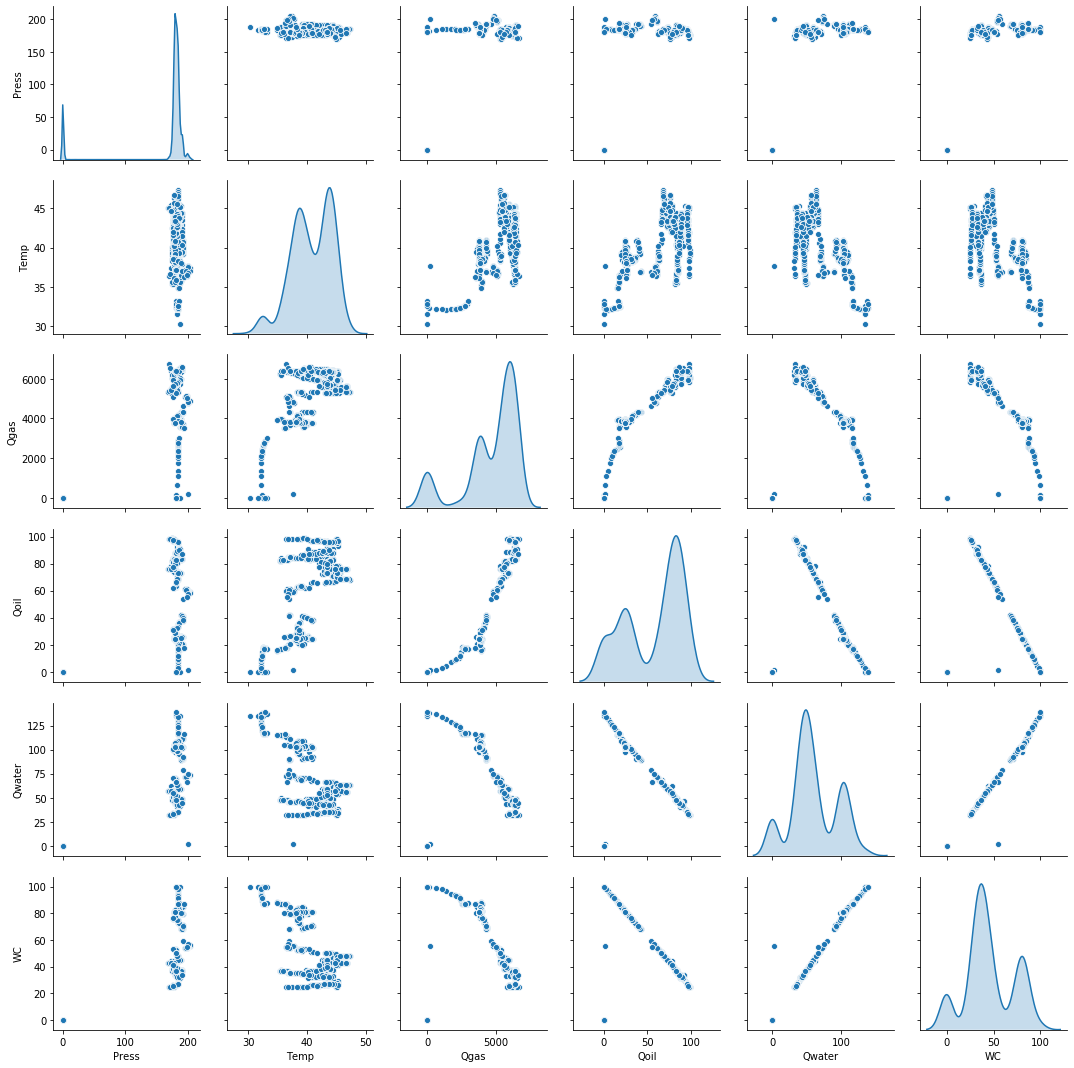

In [14]:
sns.pairplot(train_dataset[["Press","Temp", "Qgas", "Qoil", "Qwater", "WC"]], diag_kind="kde")

In [15]:
train_stats = train_dataset.describe()
train_stats.pop("Qoil")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Press,793.0,163.845271,55.493867,0.000,178.3100,181.020,184.3400,204.120
Temp,712.0,40.867233,3.367250,30.310,38.3950,40.830,43.7125,47.300
Qgas,793.0,4712.550441,1975.398990,0.000,3828.9400,5593.960,6265.4000,6721.420
VolGas,792.0,48495.300290,31629.079119,0.000,18882.6150,46227.890,77994.8400,97669.540
GOR,707.0,100.134898,68.366166,59.145,71.9720,75.803,126.5820,1465.385
VolOil,792.0,528.113283,404.564673,0.000,123.5100,470.270,903.0500,1194.180
Qwater,793.0,59.899584,33.035266,0.000,43.4100,52.930,92.3000,138.580
VolWater,792.0,811.212854,355.186551,2.810,560.2325,882.190,1124.9275,1242.340
WC,793.0,45.734552,25.214747,0.000,33.0200,40.010,70.7800,100.000


In [16]:
train_labels = train_dataset.pop('Qoil')
test_labels  = test_dataset.pop('Qoil')

In [17]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data  = norm(test_dataset)


In [18]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,
                 metrics=['mae','mse'])
    return model


In [19]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [20]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.23550859],
       [-0.24792936],
       [-0.3049391 ],
       [-0.17503941],
       [-0.2966215 ],
       [-0.27505216],
       [-0.12703708],
       [-0.34668761],
       [-0.3306724 ],
       [-0.15870255]], dtype=float32)

In [21]:
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split= 0.2, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 100, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 200, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 300, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 400, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val_mae:nan,  val_mse:nan,  
....................................................................................................
Epoch: 500, loss:nan,  mae:nan,  mse:nan,  val_loss:nan,  val

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,NaN,NaN,NaN,NaN,NaN,NaN,995
996,NaN,NaN,NaN,NaN,NaN,NaN,996
997,NaN,NaN,NaN,NaN,NaN,NaN,997
998,NaN,NaN,NaN,NaN,NaN,NaN,998
999,NaN,NaN,NaN,NaN,NaN,NaN,999


In [32]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE[wc]')

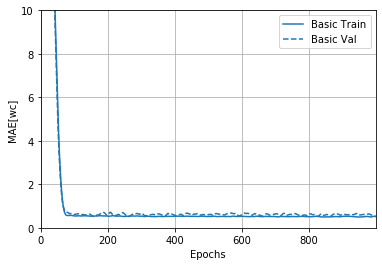

In [34]:
plotter.plot({'Basic':history}, metric="mae")
plt.ylim([0,10])
plt.ylabel('MAE[wc]')

Text(0, 0.5, 'MSE[wc^2]')

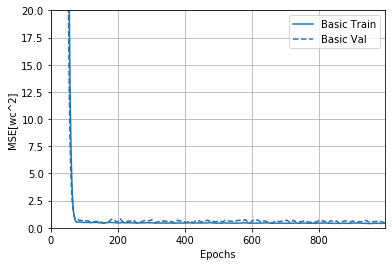

In [35]:
plotter.plot({'Basic':history}, metric="mse")
plt.ylim([0,20])
plt.ylabel('MSE[wc^2]')

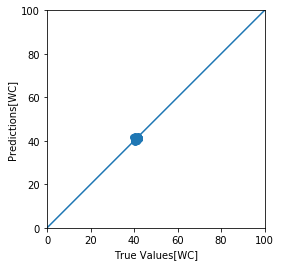

In [40]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values[WC]')
plt.ylabel('Predictions[WC]')
lims = [0,100]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [101]:
print(model.predict(normed_test_data[:1]))

print((normed_test_data.iloc[9,:]).shape)

(normed_test_data[:1]).shape

[[40.867134]]
(5,)


(1, 5)

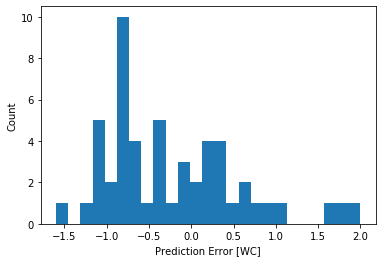

In [38]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [WC]")
_ = plt.ylabel("Count")